In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix ,f1_score,precision_score, recall_score,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [18]:
import os

file_path = 'kaggle.json'
if os.path.exists(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")

The file kaggle.json does not exist.


In [19]:
from google.colab import files

In [21]:
# Upload files interactively
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [22]:
# Create the ~/.kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Copy the kaggle.json file to the ~/.kaggle directory #This code assumes that the kaggle.json file is in the current working directory
!cp kaggle.json ~/.kaggle/

In [16]:
# #provides a higher-level interface for file operations and move this file to root loacation
# import shutil

# shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

In [23]:
# Set the appropriate permissions for the Kaggle API key file
!chmod 600 /content/kaggle.json

In [24]:
#using kaggle API Commond to download dataset
!kaggle datasets download -d arslanali4343/credit-card-cheating-detection-cccd

 76% 33.0M/43.4M [00:00<00:00, 123MB/s] 
100% 43.4M/43.4M [00:00<00:00, 120MB/s]


In [ ]:
#import Zipfile  to unzip or extract all data at project location

In [25]:
import zipfile
zip_ref = zipfile.ZipFile('/content/credit-card-cheating-detection-cccd.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [26]:
#read csv file and create a data frame
df=pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [27]:
df.shape

(284807, 31)

In [28]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

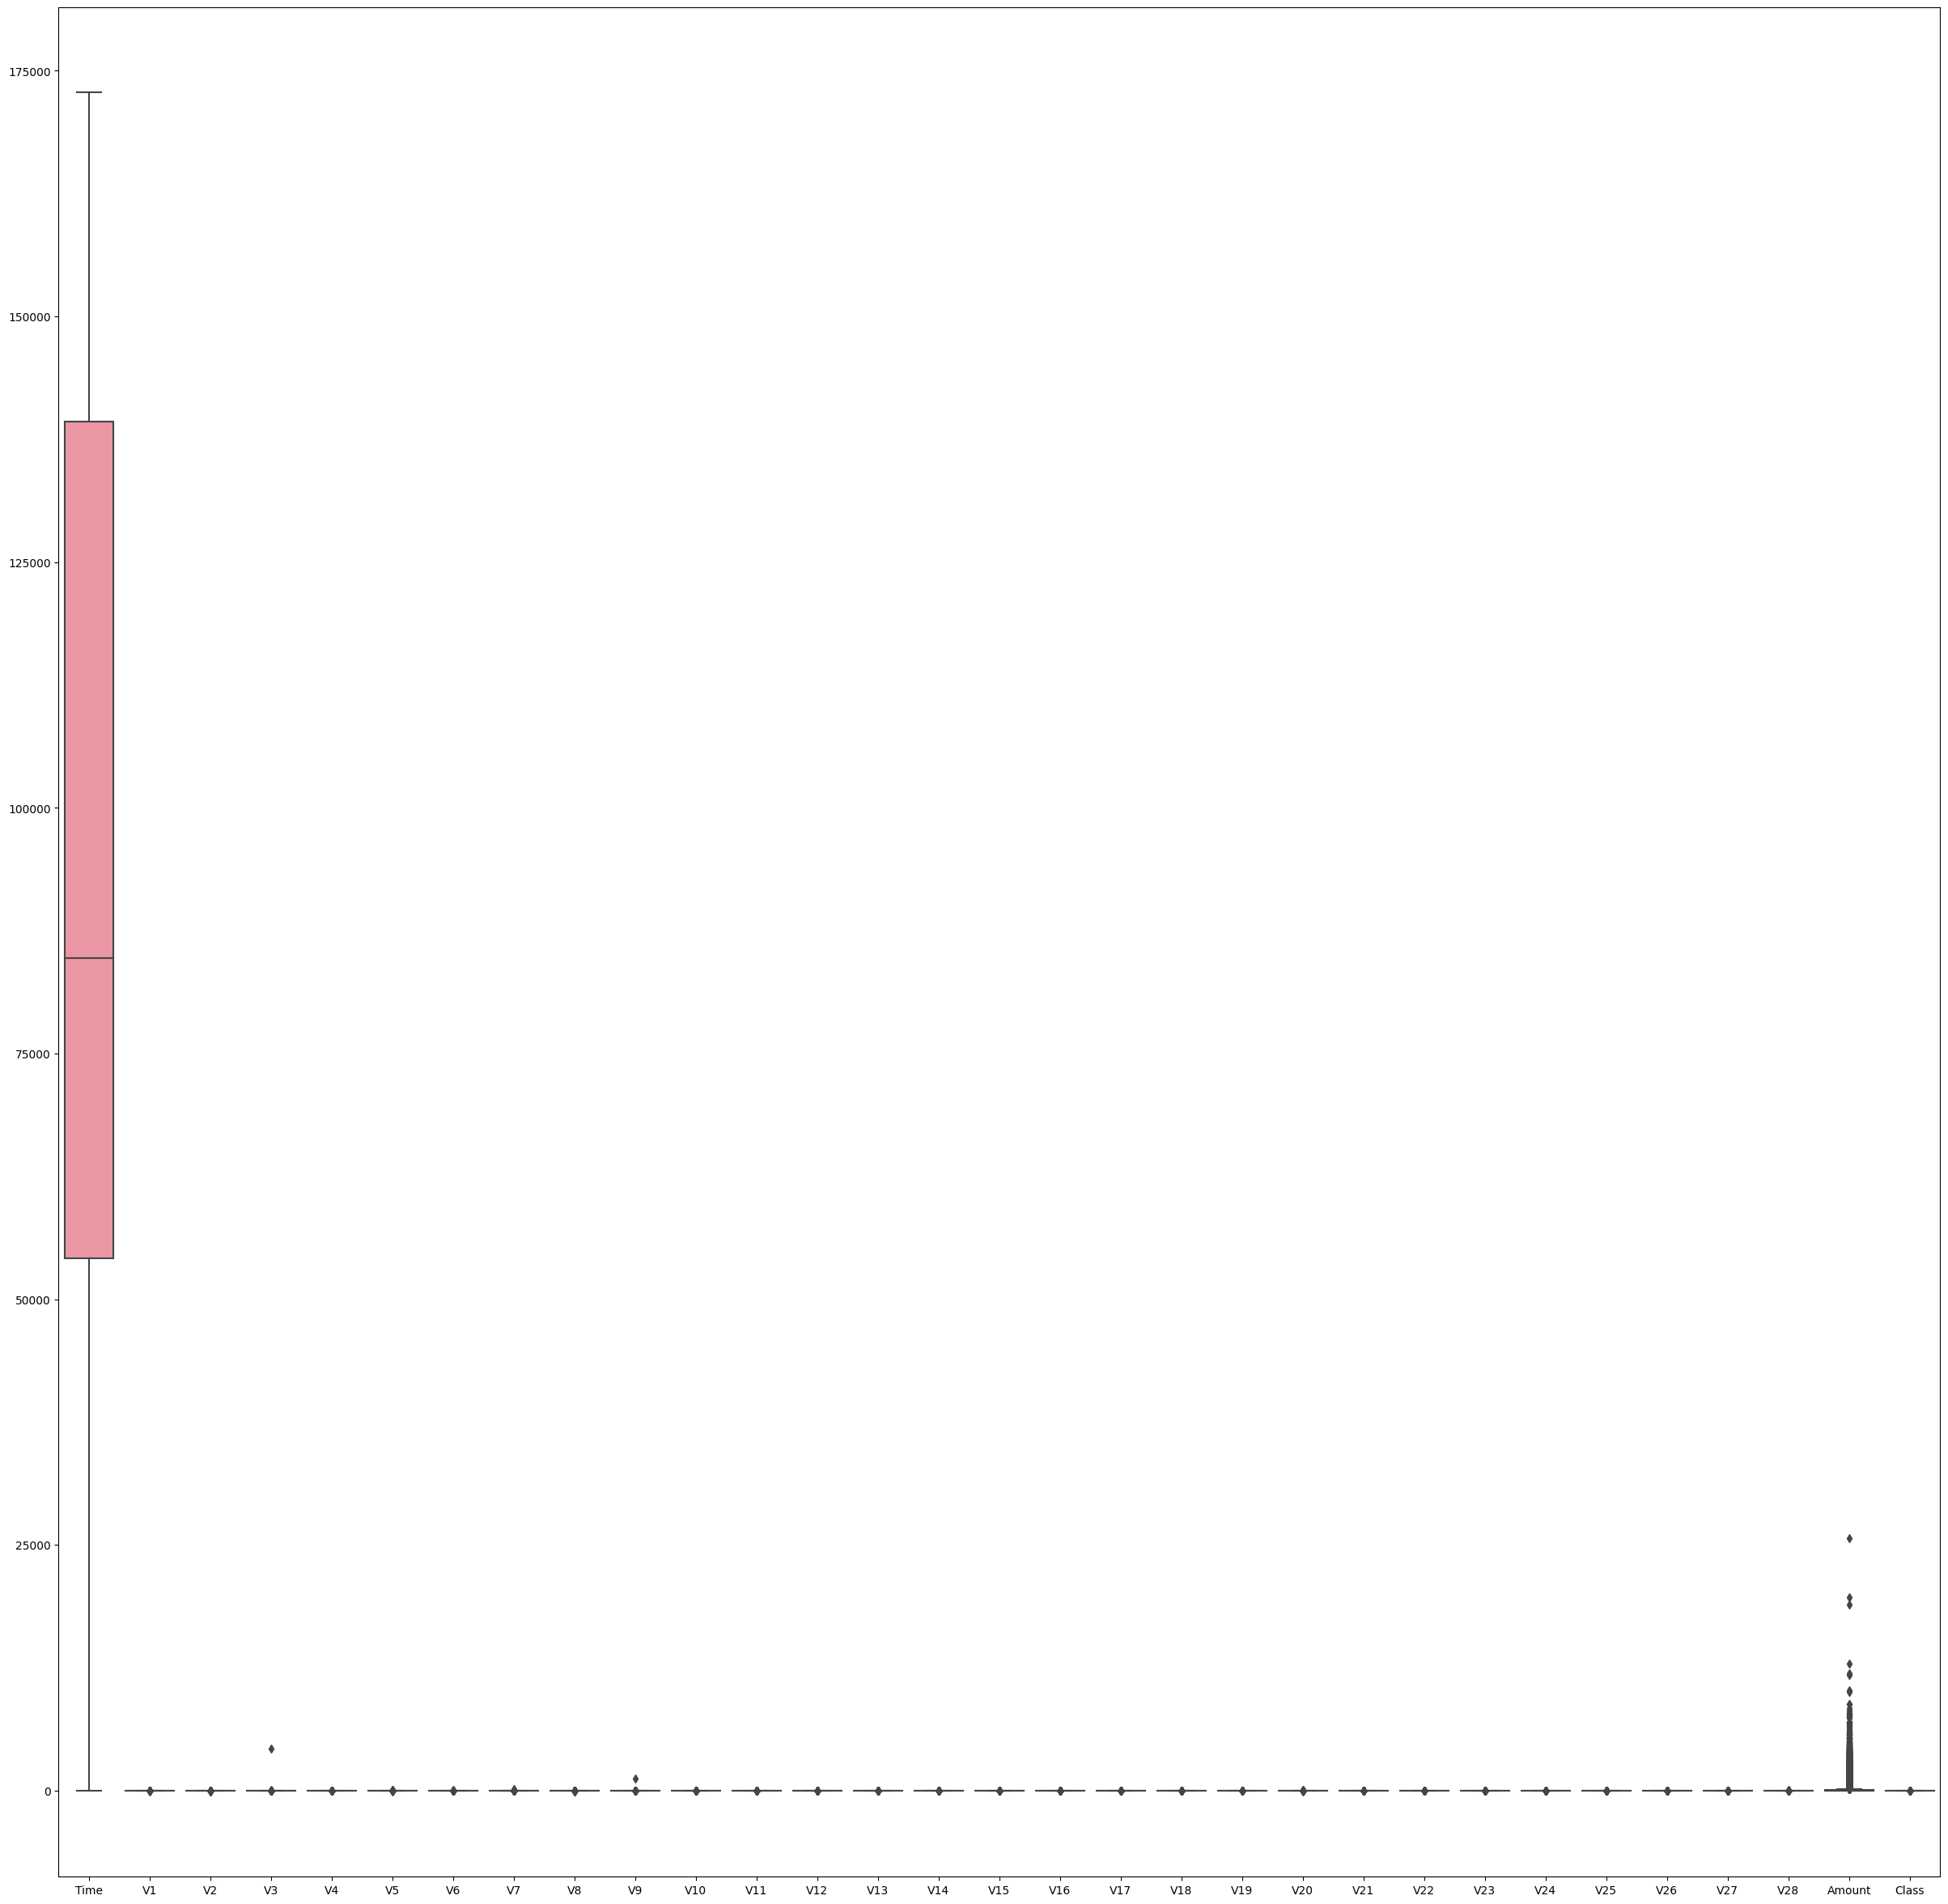

In [ ]:
#adjusting the figsize and using box plot to check outliers in dataset
fig = plt.figure(figsize = (30,30))
sns.boxplot(data=df)
plt.show()

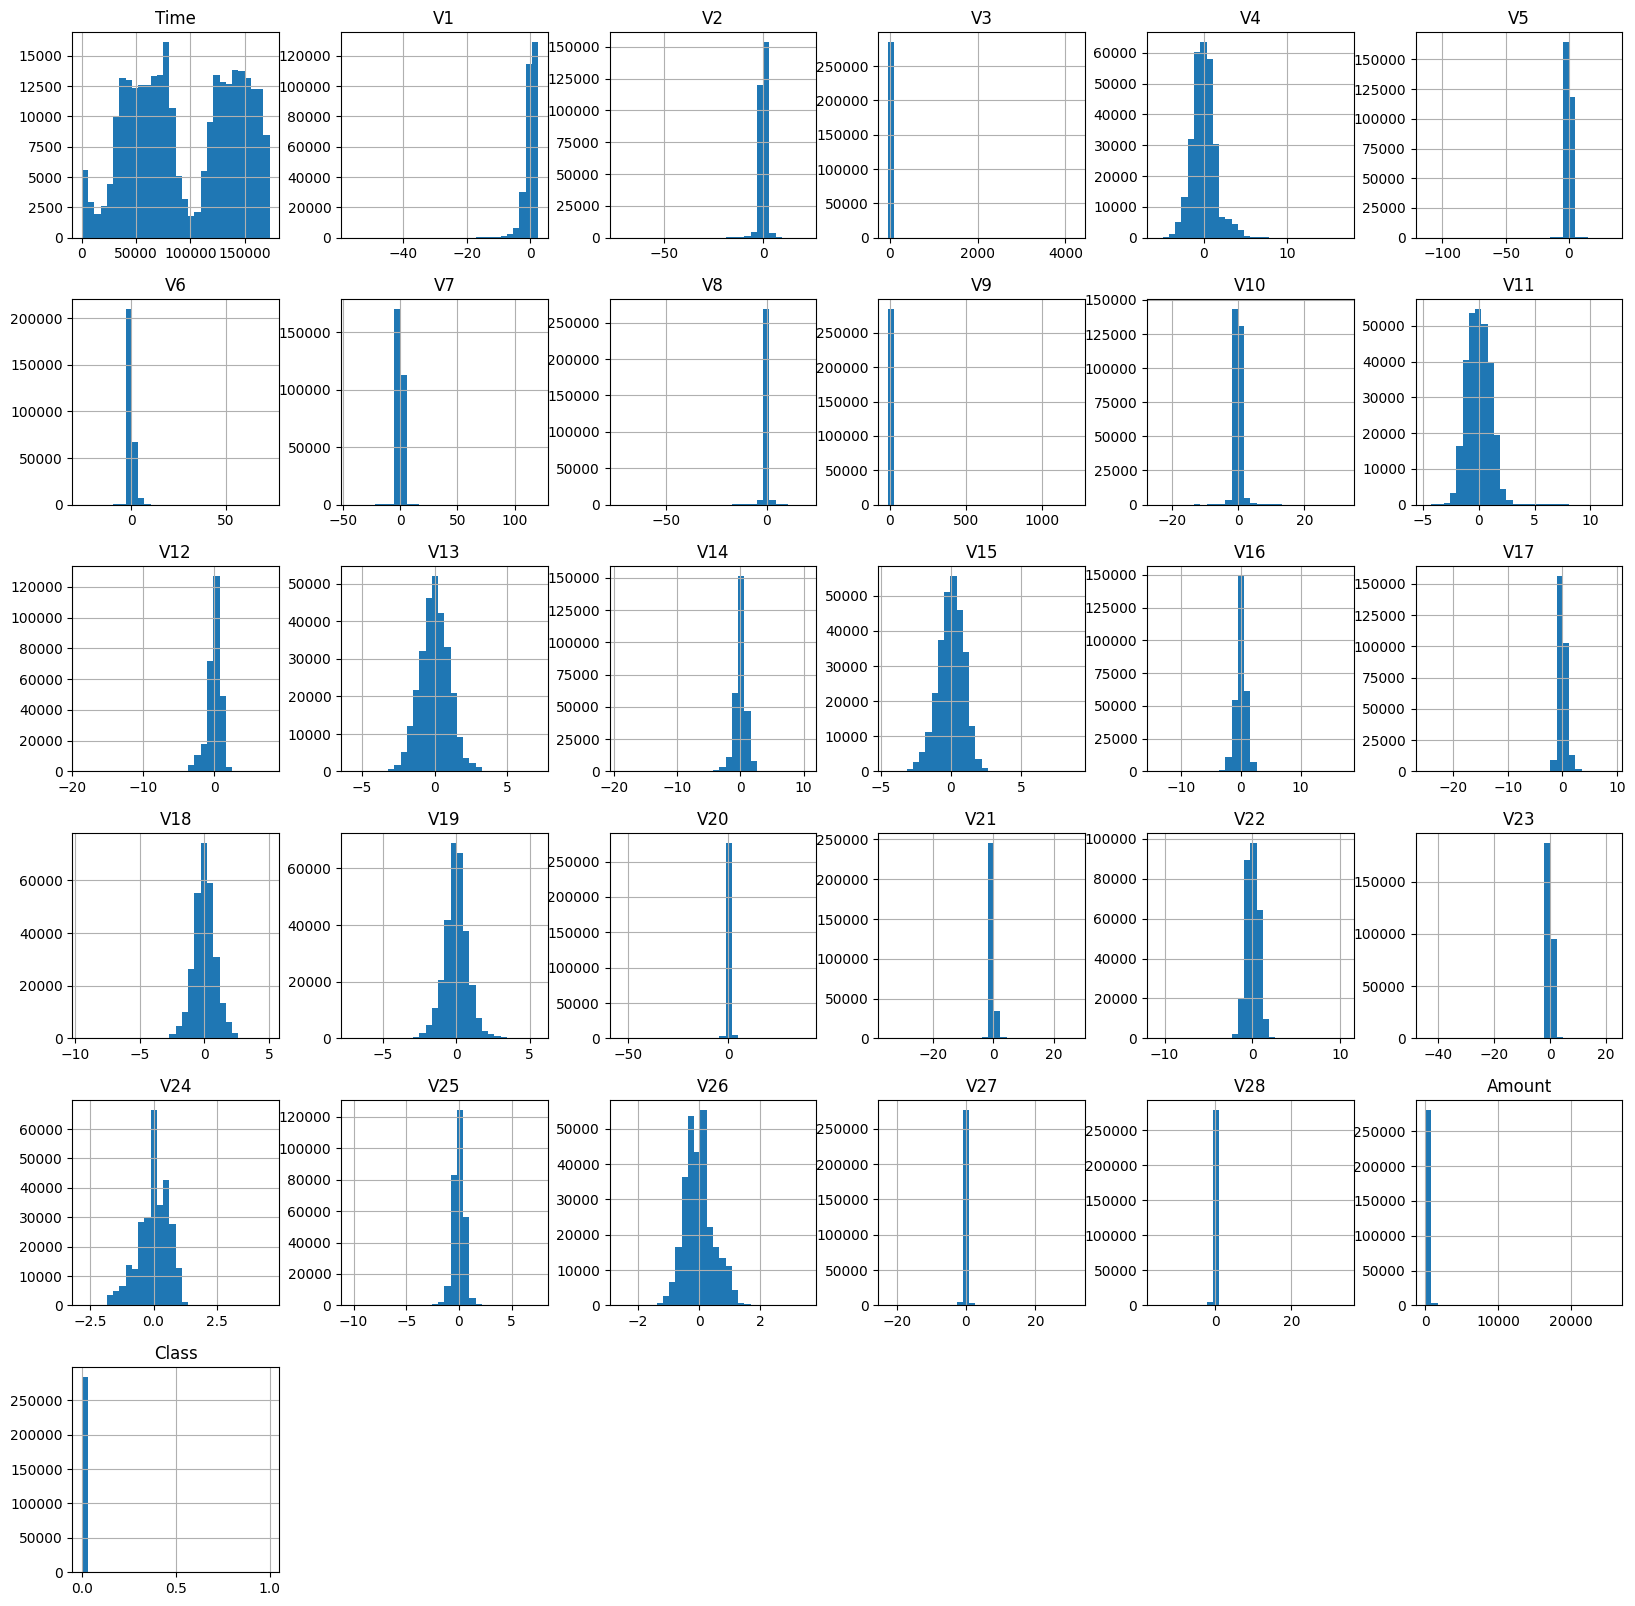

In [ ]:
#Generates histograms for each numeric column in the DataFrame
df.hist(bins=30, figsize=(20,20))
plt.show()

In [29]:
#checking amount column
print('minimum amount-',df['Amount'].min())
print('maximum amount-',df['Amount'].max())

minimum amount- 0.0
maximum amount- 25691.16


In [30]:
# IQR Method to find upper_limit and lower_limit
def IQRmethod():
  third_quantile=df['Amount'].quantile(0.75)

  first_quantile=df['Amount'].quantile(0.25)

  IQR=third_quantile-first_quantile

  upper_limit=third_quantile+(1.5*IQR)

  lower_limit=first_quantile-(1.5*IQR)

  return upper_limit , lower_limit


In [31]:
# Generic method for outliers and finding the percentage of outliers
def outlier_percentages(another_function):
  result= another_function
  upper_l=result[0]
  lower_l=result[1]

  # DataFrame's 'Amount' column is float64, and there's an attempt to perform a logical OR operation with a boolean scalar..astype(bool) to ensure that the result of the logical OR operation is a boolean array.
  my_tuple = np.where(((df['Amount'] >= upper_l) | (df['Amount'] <= lower_l)).astype(bool))

  print('my_tuple',my_tuple)
  my_array=my_tuple[0]
  array_len=len(my_array)
  print('no.of outliers',array_len)
  total_count=df['Amount'].count()
  print('total_count',total_count)
  outlier_percentage=(array_len/total_count)*100
  print('outliers_percentage',outlier_percentage)




In [32]:
#Displays the outlier percentage using IQR method
outlier_percentages(IQRmethod())

my_tuple (array([     2,     20,     51, ..., 284753, 284757, 284806]),)
no.of outliers 31904
total_count 284807
outliers_percentage 11.201971861646658


In [33]:
#Z-score method for getting upper_limit and lower_limit
def outlier_w_zscore():
  upper_limit=df['Amount'].mean()+(3*df['Amount'].std())
  lower_limit=df['Amount'].mean()-(3*df['Amount'].std())
  return upper_limit , lower_limit

In [34]:
#displaying outlier percentage using z-score
outlier_percentages(outlier_w_zscore())

my_tuple (array([    51,     89,    140, ..., 284383, 284497, 284528]),)
no.of outliers 4076
total_count 284807
outliers_percentage 1.431144599676272


In [ ]:
#outlier percentage should be 1 to 2 percentage in a dataset if I go with IQR method 11% of data have to handle so that i will choose z score method to handle outliers

In [35]:
#Generic method to handle outliers and replace with upper limit and lower limit
def outlier_handle(outlier_methods):
  result= outlier_methods
  upper_limit=result[0]
  lower_limit=result[1]
  df['Amount']=np.where(df['Amount']>=upper_limit,upper_limit,np.where(df['Amount']>=lower_limit,lower_limit,df['Amount']))

In [36]:
#Handling outlier - which is found using z-score
outlier_handle(outlier_w_zscore())

In [37]:
#After handling outliers checking the Amount column
print('minimum amount-',df['Amount'].min())
print('maximum amount-',df['Amount'].max())

minimum amount- -662.0107084696341
maximum amount- 838.7099469714968


In [38]:
# displaying the target ie class column value count for checking class imbalance
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

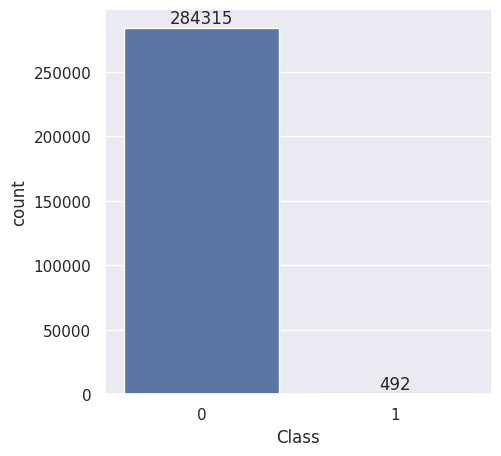

In [ ]:
#adjusting figsize and display the class imbalace with labels
plt.figure(figsize=(5,5))
ax=sns.countplot(x ='Class' , data = df)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [39]:
# import the smote from imblearn module to handle the class imbalance problem with over sampling
from imblearn.over_sampling import SMOTE
smote =SMOTE()

In [40]:
#seperate the dependent and independent variable
column=[]
for i in df.columns:
  if(i !='Class'):
    column.append(i)

In [41]:
X = df[column]
Y = df['Class']

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [42]:
# oversampling using smote
x_res,y_res=smote.fit_resample(X,Y)


In [43]:
#shape of independent variable after oversampling
x_res.shape

(568630, 30)

In [44]:
#shape of dependent or target variable after oversampling
y_res.shape

(568630,)

In [45]:
#checking the value counts of target variable after handling the class imbalance problem
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [46]:
#create the dataframe of resampled independent variable and dependent variable
dff=pd.DataFrame(x_res)
Class=pd.DataFrame(y_res)


In [47]:
#Displays the resampled target variable
Class

,Class
0,0
1,0
2,0
3,0
4,0
...,...
568625,1
568626,1
568627,1
568628,1


In [48]:
#displays the resampled independent variables
dff

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-662.010708
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-662.010708
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-662.010708
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-662.010708
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-662.010708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,27322.787824,-22.452214,12.787552,-23.921183,5.785409,-16.816520,-4.211842,-16.206001,14.869866,-3.337126,...,1.489485,1.627147,-1.611928,-1.079886,0.175778,1.623029,-0.106855,1.279190,0.393386,-662.010708
568626,142408.090114,-3.375544,0.066982,-6.104303,3.401041,0.426603,-1.558982,-1.447596,0.699092,-3.143388,...,0.246210,0.858954,1.238047,1.824857,-0.110674,1.138770,-0.024662,1.036625,0.007387,-662.010708
568627,8465.055975,0.100349,2.745091,-5.798316,4.367985,-2.298442,-2.283755,-4.645353,1.245496,-0.747348,...,0.557366,0.734845,0.015095,0.619344,0.082032,-1.738306,0.321008,0.614979,0.194854,-662.010708
568628,154376.145811,-0.602873,3.224928,-4.871964,3.068456,1.022359,-1.496879,-1.110476,0.710876,-3.118427,...,0.432146,0.447239,-0.007725,-0.331297,-0.449948,0.175956,0.608859,0.413243,0.227697,-662.010708


In [49]:
#joining both reshampled independnt and dependent variable
resampled_Data=pd.concat([dff,Class],axis=1)
resampled_Data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-662.010708,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-662.010708,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-662.010708,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-662.010708,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-662.010708,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,27322.787824,-22.452214,12.787552,-23.921183,5.785409,-16.816520,-4.211842,-16.206001,14.869866,-3.337126,...,1.627147,-1.611928,-1.079886,0.175778,1.623029,-0.106855,1.279190,0.393386,-662.010708,1
568626,142408.090114,-3.375544,0.066982,-6.104303,3.401041,0.426603,-1.558982,-1.447596,0.699092,-3.143388,...,0.858954,1.238047,1.824857,-0.110674,1.138770,-0.024662,1.036625,0.007387,-662.010708,1
568627,8465.055975,0.100349,2.745091,-5.798316,4.367985,-2.298442,-2.283755,-4.645353,1.245496,-0.747348,...,0.734845,0.015095,0.619344,0.082032,-1.738306,0.321008,0.614979,0.194854,-662.010708,1
568628,154376.145811,-0.602873,3.224928,-4.871964,3.068456,1.022359,-1.496879,-1.110476,0.710876,-3.118427,...,0.447239,-0.007725,-0.331297,-0.449948,0.175956,0.608859,0.413243,0.227697,-662.010708,1


In [50]:
#checking info of resampled data
resampled_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

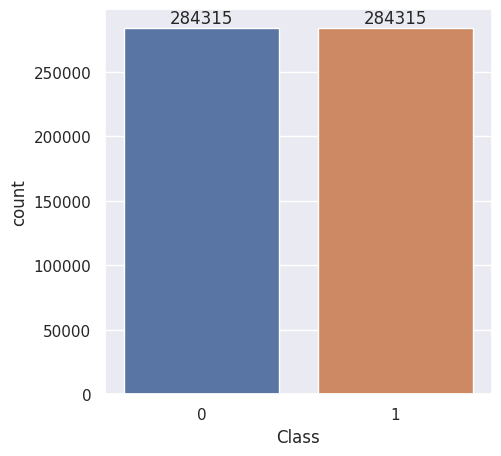

In [ ]:
#displying resampled target variable using countplot
plt.figure(figsize=(5,5))
ax=sns.countplot(x = 'Class' , data = resampled_Data)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

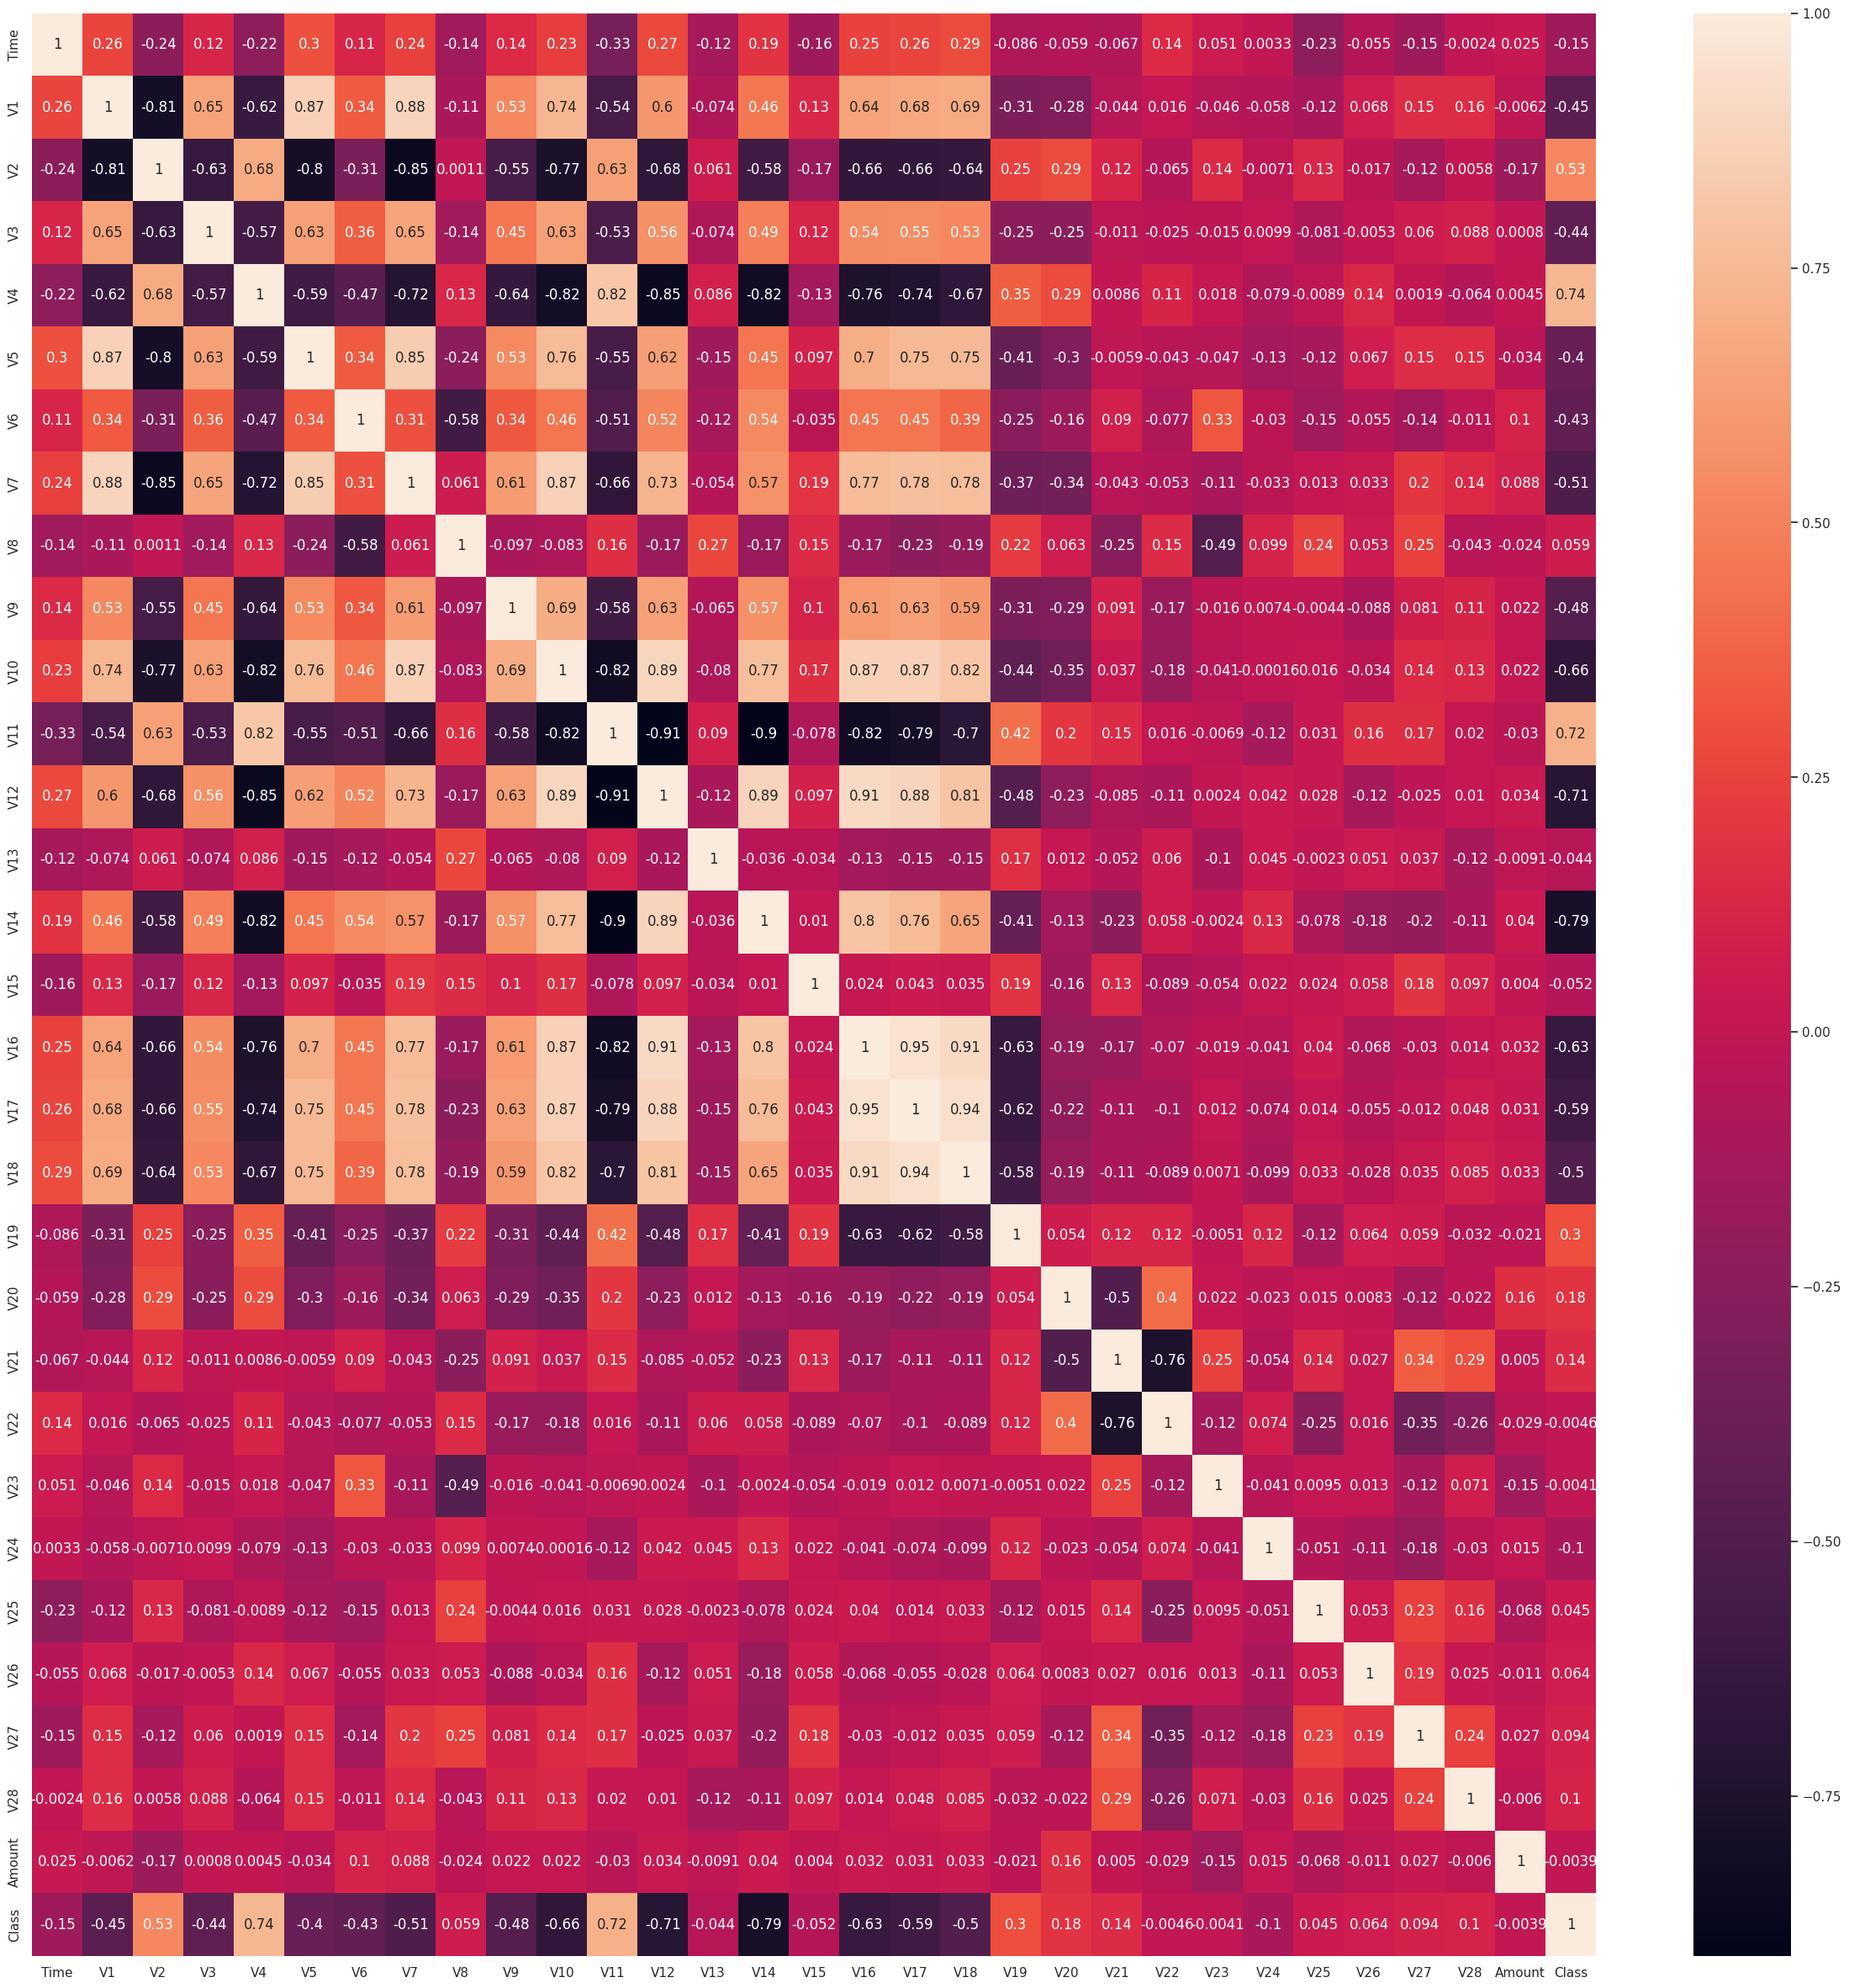

In [ ]:
#plot the heatmap to check correlation in dataset
plt.figure(figsize=(30,30))
sns.heatmap(resampled_Data.corr() ,annot=True)
plt.show()

In [51]:
#using minmax scaler to scale the resampled independent data
scale=MinMaxScaler()
scaled_Data=scale.fit_transform(dff)
scaled_df=pd.DataFrame(scaled_Data,columns=dff.columns)
scaled_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.011883,0.313023,0.763439,0.267669,0.266815,0.786444,0.011177,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.0
1,0.000000,0.978542,0.770067,0.011329,0.271796,0.766120,0.262192,0.264875,0.786298,0.010676,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.0
2,0.000006,0.935217,0.753118,0.011704,0.268766,0.762329,0.281122,0.270177,0.788042,0.009656,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.0
3,0.000006,0.941878,0.765304,0.011709,0.213661,0.765647,0.275559,0.266803,0.789434,0.009759,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.0
4,0.000012,0.938617,0.776520,0.011652,0.269796,0.762975,0.263984,0.268968,0.782484,0.011545,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.158125,0.576858,0.902186,0.005702,0.508393,0.652508,0.220674,0.166627,0.944892,0.008179,...,0.596125,0.587710,0.434835,0.649396,0.405920,0.669011,0.407994,0.440122,0.321107,0.0
568626,0.824159,0.900947,0.767965,0.009864,0.402695,0.768588,0.247346,0.256537,0.792885,0.008336,...,0.582887,0.575326,0.567786,0.692534,0.367321,0.641829,0.421420,0.435645,0.313274,0.0
568627,0.048990,0.959999,0.796223,0.009936,0.445559,0.750243,0.240059,0.237056,0.798746,0.010277,...,0.586200,0.573325,0.510735,0.674631,0.393288,0.480331,0.477884,0.427862,0.317078,0.0
568628,0.893422,0.948052,0.801286,0.010152,0.387952,0.772599,0.247970,0.258590,0.793011,0.008357,...,0.584867,0.568689,0.509671,0.660514,0.321604,0.587783,0.524904,0.424138,0.317745,0.0


In [ ]:
#importing variance inlflation factor for vif calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Generic method to check vif corresponding to the column ,statsmodels.stats.outliers_influence module typically takes a NumPy array as its first argument.
def vif_calcuation(X):
    VIF= pd.DataFrame()
    VIF['feature'] = X.columns
    VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF['VIF']=VIF['VIF'] .round(1)
    return VIF

In [ ]:
#displays the vif corresponding to the columns
vif_calcuation(scaled_df)

,feature,VIF
0,Time,7.0
1,V1,781.4
2,V2,2228.1
3,V3,62.4
4,V4,41.9
5,V5,4261.2
6,V6,555.4
7,V7,977.2
8,V8,683.2
9,V9,42.7


In [52]:
#only removed columns which have very high vif value with concern of less data loss
data=scaled_df.drop(['V2','V5','V6','V20','V27','V28'],axis=1)

In [ ]:
vif_calcuation(data)

,feature,VIF
0,Time,6.7
1,V1,632.9
2,V3,61.2
3,V4,39.4
4,V7,769.8
5,V8,414.0
6,V9,42.6
7,V10,340.5
8,V11,58.8
9,V12,201.4


In [53]:
#still data is highly correlated to each other so pca analysis handle it and for dimension reduction also that use required PCs to achive good accuracy
n_component=15
pca=PCA(n_components=n_component ,random_state=None)
pca_data=pca.fit_transform(data)

In [ ]:
explain_var_ratio=pca.explained_variance_ratio_
cumulative_exp_var_ratio=np.cumsum(explain_var_ratio)

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

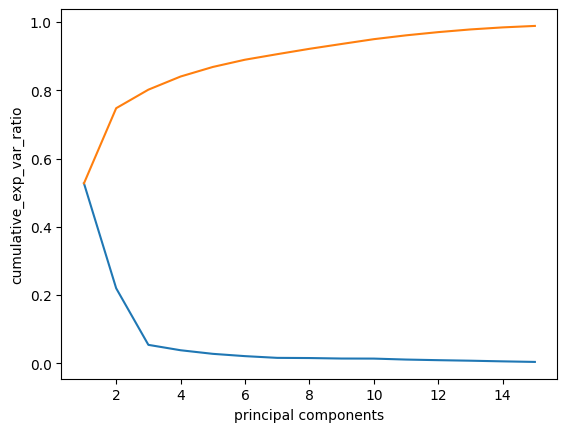

In [ ]:
#visuslise cumulative explained variance ratio vs no. of PCs
plt.plot(range(1,n_component+1),explain_var_ratio)
plt.plot(range(1,n_component+1),cumulative_exp_var_ratio)
plt.ylabel("cumulative_exp_var_ratio")
plt.xlabel("principal components")
plt.grid

In [ ]:
#we have covered more than 90 % percent of data in 15 PCs

In [54]:
#list of columns
column_names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15']

In [55]:
#create data frame for 15 principal components
pca_data=pd.DataFrame(pca_data,columns=column_names)
pca_data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pca11,pca12,pca13,pca14,pca15
0,-0.058538,0.561697,-0.036810,-0.007870,-0.016891,-0.064538,0.098224,-0.009043,-0.066344,0.058330,-0.018854,-0.046381,-0.006314,-0.033938,-0.004750
1,-0.055789,0.569833,0.014588,-0.014407,-0.037411,0.021957,-0.031961,0.023266,-0.021977,-0.000627,0.000509,0.005834,0.018768,0.069465,0.023718
2,-0.066831,0.580014,0.030596,-0.010430,0.016396,0.004876,-0.048715,0.020566,-0.064710,0.034807,-0.181457,-0.015968,0.118149,0.012208,0.010184
3,-0.135431,0.588715,0.067076,-0.014258,0.054931,0.023373,-0.115845,0.019750,-0.085227,-0.057849,-0.014537,0.016802,-0.037099,-0.092330,0.016836
4,-0.070471,0.563536,-0.067188,-0.015177,-0.064279,0.108305,0.016075,0.044724,0.017204,0.034505,0.037037,-0.046196,-0.020395,-0.052227,0.073434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.561638,0.186043,-0.143888,0.012600,0.138639,-0.000287,-0.071512,0.010383,0.043337,0.200570,-0.027055,0.167973,-0.075406,0.001458,-0.035541
568626,0.095228,-0.374168,-0.018093,-0.023404,-0.064541,0.072841,-0.040799,-0.036898,-0.024604,0.005690,0.061512,0.039475,-0.018963,0.004151,0.055443
568627,0.479535,0.309173,0.140980,-0.019599,-0.148081,0.072125,0.049359,-0.071004,-0.021561,-0.043139,0.102101,0.003239,0.084328,0.014953,-0.037242
568628,-0.082089,-0.383454,0.185941,-0.026417,-0.073040,0.069077,-0.035324,0.027325,0.022539,0.014539,0.045830,0.052069,-0.005478,0.000086,0.044178


In [56]:
#spliting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(pca_data,Class,test_size=0.30 ,random_state=42)

In [ ]:
# to increase output scroll height
from IPython.display import display, HTML
display(HTML("""
<style>
    div.output_scroll {height: 60em; }
</style>
"""))

In [ ]:
# Apply various Machine Learning models to check which one is give best accuracy

Training accuracy score of  LogisticRegression 0.9726410093432586
Testing accuracy score of  LogisticRegression 0.9726301226925534
Precision of  LogisticRegression 0.9864257753688648
Recall of LogisticRegression 0.9585440074906367
F1 Score of  LogisticRegression 0.9722850443712343
classifcation_report of LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     85149
           1       0.99      0.96      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589

Confusion Matrix of LogisticRegression


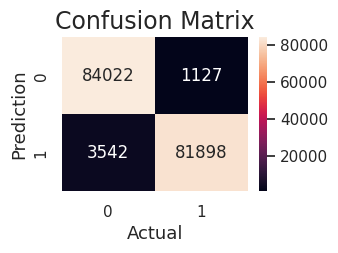



Training accuracy score of  KNeighborsClassifier 0.9994246823819657
Testing accuracy score of  KNeighborsClassifier 0.9991500038103277
Precision of  KNeighborsClassifier 0.9983057778816381
Recall of KNeighborsClassifier 1.0
F1 Score of  KNeighborsClassifier 0.9991521707352726
classifcation_report of KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion Matrix of KNeighborsClassifier


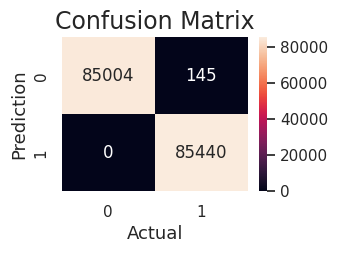



Training accuracy score of  SVC 0.9901417190691412
Testing accuracy score of  SVC 0.990022803346054
Precision of  SVC 0.9935635977838029
Recall of SVC 0.9864700374531835
F1 Score of  SVC 0.9900041111176368
classifcation_report of SVC
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85149
           1       0.99      0.99      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

Confusion Matrix of SVC


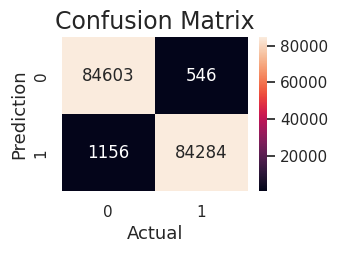



Training accuracy score of  GaussianNB 0.9099941965777395
Testing accuracy score of  GaussianNB 0.9090445456623815
Precision of  GaussianNB 0.9459780085210603
Recall of GaussianNB 0.8679658239700374
F1 Score of  GaussianNB 0.9052943833392336
classifcation_report of GaussianNB
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     85149
           1       0.95      0.87      0.91     85440

    accuracy                           0.91    170589
   macro avg       0.91      0.91      0.91    170589
weighted avg       0.91      0.91      0.91    170589

Confusion Matrix of GaussianNB


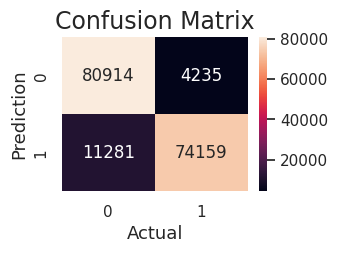



Training accuracy score of  DecisionTreeClassifier 1.0
Testing accuracy score of  DecisionTreeClassifier 0.9976962172238538
Precision of  DecisionTreeClassifier 0.9969498299617853
Recall of DecisionTreeClassifier 0.9984550561797753
F1 Score of  DecisionTreeClassifier 0.9977018753398944
classifcation_report of DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion Matrix of DecisionTreeClassifier


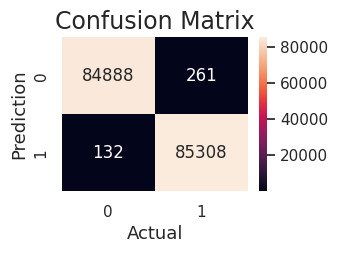



Training accuracy score of  RandomForestClassifier 1.0
Testing accuracy score of  RandomForestClassifier 0.9997948285059411
Precision of  RandomForestClassifier 0.9995905235448962
Recall of RandomForestClassifier 1.0
F1 Score of  RandomForestClassifier 0.9997952198461223
classifcation_report of RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion Matrix of RandomForestClassifier


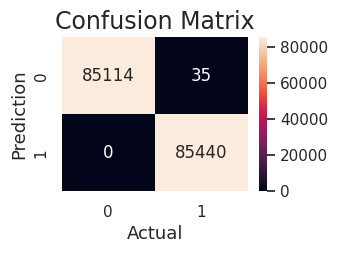



Training accuracy score of  AdaBoostClassifier 0.9719651995648689
Testing accuracy score of  AdaBoostClassifier 0.9716628856491333
Precision of  AdaBoostClassifier 0.9837250054009938
Recall of AdaBoostClassifier 0.9592930711610487
F1 Score of  AdaBoostClassifier 0.9713554320387775
classifcation_report of AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85149
           1       0.98      0.96      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589

Confusion Matrix of AdaBoostClassifier


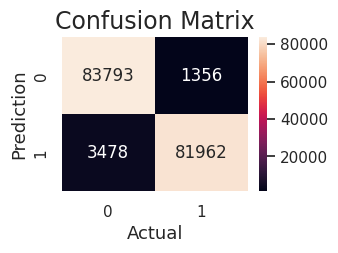



Training accuracy score of  BaggingClassifier 0.9999673400478846
Testing accuracy score of  BaggingClassifier 0.9992203483225764
Precision of  BaggingClassifier 0.9988771798500568
Recall of BaggingClassifier 0.9995669475655431
F1 Score of  BaggingClassifier 0.999221944670321
classifcation_report of BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion Matrix of BaggingClassifier


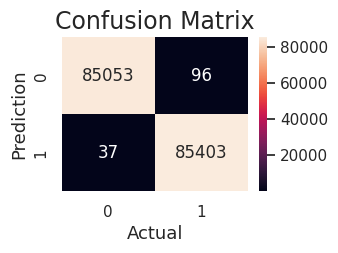



Training accuracy score of  GradientBoostingClassifier 0.9792006351104534
Testing accuracy score of  GradientBoostingClassifier 0.9790197492218138
Precision of  GradientBoostingClassifier 0.9900506447325886
Recall of GradientBoostingClassifier 0.9678370786516854
F1 Score of  GradientBoostingClassifier 0.9788178476944656
classifcation_report of GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85149
           1       0.99      0.97      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589

Confusion Matrix of GradientBoostingClassifier


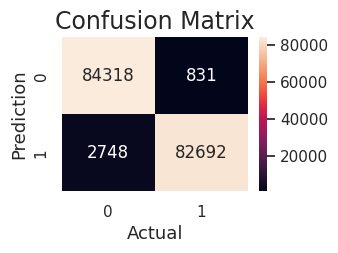



Training accuracy score of  VotingClassifier 0.9931615084878191
Testing accuracy score of  VotingClassifier 0.9927721013664421
Precision of  VotingClassifier 0.9991464238716791
Recall of VotingClassifier 0.9864115168539326
F1 Score of  VotingClassifier 0.9927381309963426
classifcation_report of VotingClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     85149
           1       1.00      0.99      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

Confusion Matrix of VotingClassifier


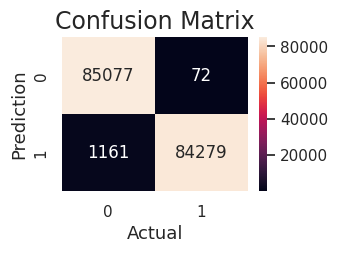

In [ ]:
logistic_model=LogisticRegression()
KNN_model=KNeighborsClassifier()
svc_model=SVC()
gaussianNB_model=GaussianNB()
desicion_tree_clf=DecisionTreeClassifier()
random_forest_clf=RandomForestClassifier()
adaBoost_clf=AdaBoostClassifier()
bagging_clf=BaggingClassifier()
gradientBoost_clf=GradientBoostingClassifier()


voting_clf_hard=VotingClassifier(estimators=[('lr',logistic_model),('knn',KNN_model),('svc',svc_model),('gaussian_model',gaussianNB_model),
                                       ('desicion_tree',desicion_tree_clf),('rand_forest',random_forest_clf)],voting='hard')


model_list=[logistic_model,KNN_model,svc_model,gaussianNB_model,desicion_tree_clf,
            random_forest_clf,adaBoost_clf,bagging_clf,gradientBoost_clf,voting_clf_hard]


for model in model_list:
    model.fit(x_train,y_train)

    print('Training accuracy score of ', model.__class__.__name__, model.score(x_train,y_train))

    y_pred=model.predict(x_test)

    print('Testing accuracy score of ', model.__class__.__name__,accuracy_score(y_test,y_pred))

    precision = precision_score(y_test,y_pred)
    print("Precision of ",model.__class__.__name__, precision)

    recall = recall_score(y_test,y_pred)
    print("Recall of",model.__class__.__name__ , recall)

    f1 = f1_score(y_test,y_pred)
    print("F1 Score of ",model.__class__.__name__ , f1)

    classifcation_report=classification_report(y_test,y_pred)
    print("classifcation_report of" , model.__class__.__name__ )
    print(classifcation_report)

    conf_matrix = confusion_matrix(y_test,y_pred)
    print("Confusion Matrix of" , model.__class__.__name__)
    plt.figure(figsize=(3,2))
    sns.heatmap(conf_matrix, annot=True,fmt='g')
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()

    print('\n')

In [ ]:
#KNeighborsClassifier,SVC,VotingClassifier,BaggingClassifier,
#RandomForestClassifier,DecisionTreeClassifier,haveing best performace on this dataset both training and testing accuracy is 99%

In [ ]:
# implementation of deep learning on same data

In [57]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Dropout
from keras.optimizers import Adam
from keras .callbacks import EarlyStopping

In [58]:
# Define the model
model=Sequential()
# Input layer and first hidden layer
model.add(Dense(32,input_dim=pca_data.shape[1],activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))

# Additional hidden layers
model.add(Dense(16,activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))

# Additional hidden layers
model.add(Dense(8,activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1,activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor= 'val_loss', patience=10,verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test,y_test), verbose=1,callbacks=[early_stopping])

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(x_train, y_train ,verbose=1)
print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(x_test, y_test,verbose=1)
print(f'Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}')

Epoch 1/100
6220/6220 [==============================] - 34s 5ms/step - loss: 0.1121 - accuracy: 0.9638 - val_loss: 0.0508 - val_accuracy: 0.9822
Epoch 2/100
6220/6220 [==============================] - 35s 6ms/step - loss: 0.0643 - accuracy: 0.9779 - val_loss: 0.0443 - val_accuracy: 0.9842
Epoch 3/100
6220/6220 [==============================] - 32s 5ms/step - loss: 0.0561 - accuracy: 0.9807 - val_loss: 0.0328 - val_accuracy: 0.9893
Epoch 4/100
6220/6220 [==============================] - 37s 6ms/step - loss: 0.0530 - accuracy: 0.9819 - val_loss: 0.0300 - val_accuracy: 0.9900
Epoch 5/100
6220/6220 [==============================] - 30s 5ms/step - loss: 0.0507 - accuracy: 0.9828 - val_loss: 0.0299 - val_accuracy: 0.9907
Epoch 6/100
6220/6220 [==============================] - 38s 6ms/step - loss: 0.0480 - accuracy: 0.9837 - val_loss: 0.0311 - val_accuracy: 0.9905
Epoch 7/100
6220/6220 [==============================] - 35s 6ms/step - loss: 0.0470 - accuracy: 0.9842 - val_loss: 0.0259 -

In [59]:
y_pred=model.predict(x_test)

5331/5331 [==============================] - 8s 2ms/step


In [60]:
from sklearn.metrics import r2_score ,f1_score,precision_score, recall_score,classification_report,confusion_matrix
r2_score(y_test,y_pred)

0.9850462082646001

In [ ]:
# Artificial Neural Network (ANN) model and encountering issues related to a mix of binary and continuous targets
# If your model's predictions (y_pred) are continuous values between 0 and 1,
#we need to threshold them to get binary predictions before computing classification metrics

In [61]:
# here y_test is a DataFrame with a column 'Class'
y_test_labels = y_test["Class"].values

# Assuming y_pred contains probabilities, thresholding at 0.5
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Compute F1 score
F1_score = f1_score(y_test_labels, y_pred_binary)
print('F1_score--',F1_score)

#precision score
Precision_score=precision_score(y_test_labels,y_pred_binary)
print('Precision_score--',Precision_score)

#recall
Recall_score=recall_score(y_test_labels,y_pred_binary)
print('Recall_score--',Recall_score)

#Classification_report
Classification_report=classification_report(y_test_labels,y_pred_binary)
print('Classification_report--')
print(Classification_report)

print('\n')

F1_score-- 0.9958513982540814
Precision_score-- 0.9943291871834963
Recall_score-- 0.9973782771535581
Classification_report--
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85149
           1       0.99      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589





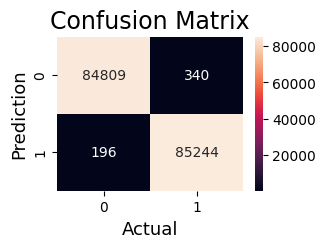

In [ ]:
#plot the confusion matrix
confusions_matrix = confusion_matrix(y_test_labels,y_pred_binary)
plt.figure(figsize=(3,2))
sns.heatmap(confusions_matrix, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

5331/5331 [==============================] - 10s 2ms/step


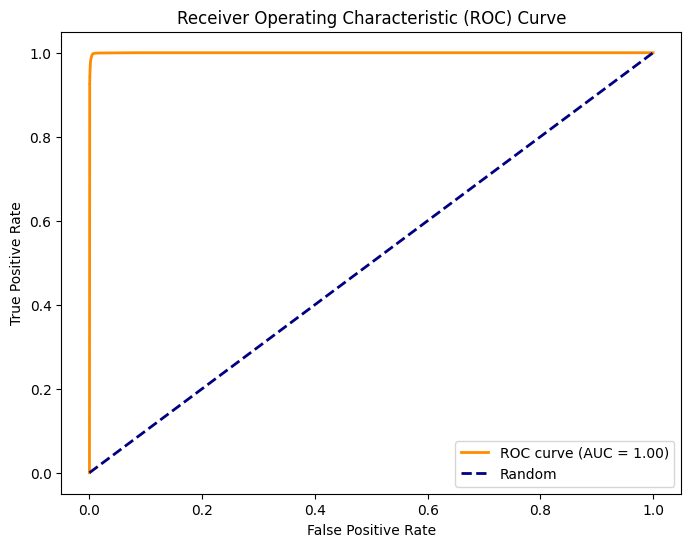

In [64]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities for the positive class ,flattens the matrix into a 1-dimensional array.
#In the context of binary classification, this array now contains the predicted probabilities for the positive class.
y_probs = model.predict(x_test).ravel()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#I am  getting good performance of this ANN model with --

        #Training Loss: 0.0155, Training Accuracy: 0.9961

        #Testing Loss: 0.0174, Testing Accuracy: 0.9958 in less training time than meachine learning models
